In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Exploratory Data Analysis
#### Data Preprocessing

In [2]:
# Reading the train and test data set files.
train = pd.read_csv("C:/Users/prati/OneDrive/Desktop/interview files/MTX/assignment/capstone_train.csv")
test = pd.read_csv("C:/Users/prati/OneDrive/Desktop/interview files/MTX/assignment/capstone_test.csv")

In [3]:
train.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,Assassin vine
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,Assassin vine
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,Ascomoid
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,Assassin vine
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,Assassin vine


In [4]:
train.shape

(464809, 13)

In [5]:
test.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,3258,225,2,631,148,1739,217,240.0,161,2340,31,3,Ascomoid
1,3033,229,24,552,341,2277,176,253.0,206,1318,13,3,Assassin vine
2,2838,355,20,108,21,674,183,201.0,152,418,31,3,Assassin vine
3,3098,122,10,242,76,4821,238,232.0,124,268,29,1,Assassin vine
4,3221,189,24,153,41,2121,214,250.0,157,1423,33,3,Ascomoid


In [6]:
test.shape

(116203, 13)

In [7]:
train.describe()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,371776.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.483063,155.661235,14.099759,269.290644,46.390412,2351.779462,212.157323,223.311841,142.518338,1980.473990,24.370455,2.113563
std,279.781777,111.919973,7.486816,212.411427,58.240912,1559.868239,26.775574,19.744363,38.273670,1325.289344,9.478907,1.061051
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,20.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,29.000000,2.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,237.000000,168.000000,2550.000000,31.000000,3.000000
max,3858.000000,360.000000,65.000000,1390.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,40.000000,4.000000


We can see that there are some missing values in column 'Shadow_In_Midday'. We will replace the missing values with the mean.

In [8]:
test.describe()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
count,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,93124.000000,116203.000000,116203.000000,116203.000000,116203.000000
mean,2958.894254,155.639097,14.119481,269.978503,46.532628,2343.615251,212.100953,223.332374,142.567963,1979.560175,24.330396,2.118061
std,280.795803,111.889190,7.493954,213.100200,58.512119,1556.788570,26.747203,19.825772,38.278104,1319.815068,9.511329,1.062266
min,1871.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2808.000000,58.000000,9.000000,108.000000,7.000000,1101.000000,198.000000,213.000000,119.000000,1025.000000,20.000000,1.000000
50%,2997.000000,127.000000,13.000000,218.000000,29.000000,1991.000000,218.000000,226.000000,143.000000,1711.000000,29.000000,3.000000
75%,3164.000000,260.000000,18.000000,390.000000,69.000000,3315.000000,231.000000,237.000000,168.000000,2552.000000,31.000000,3.000000
max,3858.000000,360.000000,66.000000,1397.000000,597.000000,7116.000000,254.000000,254.000000,252.000000,7145.000000,40.000000,4.000000


Similarly, in the test dataset also, there are some missing values in the column 'Shadow_In_Midday'. we will replace this one also with the mean instead of just deleting those records.

In [9]:
train['Shadow_In_Midday'].fillna(int(train['Shadow_In_Midday'].mean()), inplace=True)
train.describe()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.483063,155.661235,14.099759,269.290644,46.390412,2351.779462,212.157323,223.249425,142.518338,1980.473990,24.370455,2.113563
std,279.781777,111.919973,7.486816,212.411427,58.240912,1559.868239,26.775574,17.658641,38.273670,1325.289344,9.478907,1.061051
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,217.000000,119.000000,1024.000000,20.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,223.000000,143.000000,1710.000000,29.000000,2.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,234.000000,168.000000,2550.000000,31.000000,3.000000
max,3858.000000,360.000000,65.000000,1390.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,40.000000,4.000000


In [10]:
test['Shadow_In_Midday'].fillna(int(test['Shadow_In_Midday'].mean()), inplace=True)
test.describe()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
count,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000
mean,2958.894254,155.639097,14.119481,269.978503,46.532628,2343.615251,212.100953,223.266361,142.567963,1979.560175,24.330396,2.118061
std,280.795803,111.889190,7.493954,213.100200,58.512119,1556.788570,26.747203,17.748592,38.278104,1319.815068,9.511329,1.062266
min,1871.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2808.000000,58.000000,9.000000,108.000000,7.000000,1101.000000,198.000000,217.000000,119.000000,1025.000000,20.000000,1.000000
50%,2997.000000,127.000000,13.000000,218.000000,29.000000,1991.000000,218.000000,223.000000,143.000000,1711.000000,29.000000,3.000000
75%,3164.000000,260.000000,18.000000,390.000000,69.000000,3315.000000,231.000000,234.000000,168.000000,2552.000000,31.000000,3.000000
max,3858.000000,360.000000,66.000000,1397.000000,597.000000,7116.000000,254.000000,254.000000,252.000000,7145.000000,40.000000,4.000000


In [11]:
labels = train['Plant_Type'].astype('category').cat.categories.tolist()
labels

['Ascomoid',
 'Assassin vine',
 'Basidirond',
 'Dark tree',
 'Hangman tree',
 'Kelpie',
 'Myconid:']

In [12]:
new_labels = {'Plant_Type' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
new_labels

{'Plant_Type': {'Ascomoid': 1,
  'Assassin vine': 2,
  'Basidirond': 3,
  'Dark tree': 4,
  'Hangman tree': 5,
  'Kelpie': 6,
  'Myconid:': 7}}

In [13]:
train_new = train.copy()
train_new.replace(new_labels, inplace=True)
train_new.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,2
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,2
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,1
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,2
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,2


converting categorical values of variable - 'plant type' into numerical values.

In [14]:
labels = test['Plant_Type'].astype('category').cat.categories.tolist()
new_labels = {'Plant_Type' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
test_new = test.copy()
test_new.replace(new_labels, inplace=True)
test_new.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,3258,225,2,631,148,1739,217,240.0,161,2340,31,3,1
1,3033,229,24,552,341,2277,176,253.0,206,1318,13,3,2
2,2838,355,20,108,21,674,183,201.0,152,418,31,3,2
3,3098,122,10,242,76,4821,238,232.0,124,268,29,1,2
4,3221,189,24,153,41,2121,214,250.0,157,1423,33,3,1


### Data Engineering

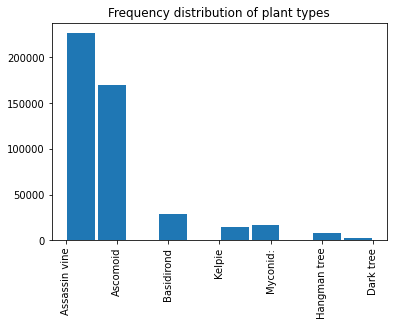

In [15]:
plt.hist(train['Plant_Type'], rwidth=0.9)
plt.xticks(rotation='vertical')
plt.title('Frequency distribution of plant types')
plt.show()

From the histogram, we can see that plant type - Assassin Vine and Ascomoid have a lot of records present as compared to other plant types. This means that 'Assassin Vine and Ascomoid' are present in large quantity while other plant types are comparatively less.
Let us see the boxplot for all the variables and boxplot of the plant type varibale.

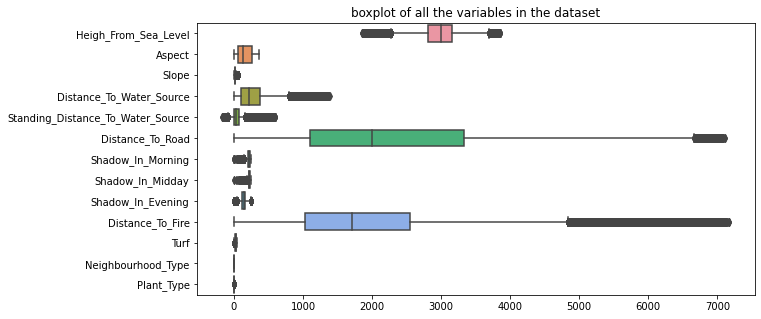

In [16]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data = train_new, orient = 'h')
plt.title('boxplot of all the variables in the dataset')
plt.show()

<AxesSubplot:>

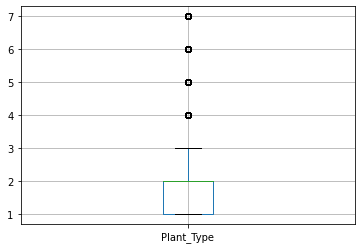

In [17]:
train_new.boxplot('Plant_Type')

from the boxplot of all the variable, it seems that there are lot of outliers present in the data. But, when we see the boxplot of the plant type, we can see that plant type 3,4,5,6,7 are also shown as outliers. This is just a scenario of unbalance of data. The plant types other than 1 and 2 are not the outliers.


,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
Heigh_From_Sea_Level,1.000000,0.016035,-0.241253,0.306403,0.093903,0.365264,0.111430,0.184035,0.058855,0.147503,0.688972,-0.313981,-0.269510
Aspect,0.016035,1.000000,0.078874,0.018079,0.070650,0.024281,-0.579443,0.300375,0.646862,-0.108466,0.008013,0.139175,0.016693
Slope,-0.241253,0.078874,1.000000,-0.010676,0.274438,-0.215430,-0.326809,-0.471471,-0.175916,-0.184452,-0.105490,0.285623,0.148425
Distance_To_Water_Source,0.306403,0.018079,-0.010676,1.000000,0.606458,0.073062,-0.028004,0.043291,0.053260,0.053350,0.194087,0.056192,-0.020926
Standing_Distance_To_Water_Source,0.093903,0.070650,0.274438,0.606458,1.000000,-0.045229,-0.166582,-0.097527,0.036040,-0.068878,0.071373,0.188804,0.081231
Distance_To_Road,0.365264,0.024281,-0.215430,0.073062,-0.045229,1.000000,0.034411,0.169789,0.105629,0.331770,0.240599,-0.445544,-0.152594
Shadow_In_Morning,0.111430,-0.579443,-0.326809,-0.028004,-0.166582,0.034411,1.000000,0.009298,-0.780706,0.132460,0.040521,-0.233838,-0.034811
Shadow_In_Midday,0.184035,0.300375,-0.471471,0.043291,-0.097527,0.169789,0.009298,1.000000,0.530737,0.051282,0.013557,-0.072339,-0.086079
Shadow_In_Evening,0.058855,0.646862,-0.175916,0.053260,0.036040,0.105629,-0.780706,0.530737,1.000000,-0.048473,-0.000776,0.105747,-0.048911
Distance_To_Fire,0.147503,-0.108466,-0.184452,0.053350,-0.068878,0.331770,0.132460,0.051282,-0.048473,1.000000,0.100806,-0.416372,-0.108442


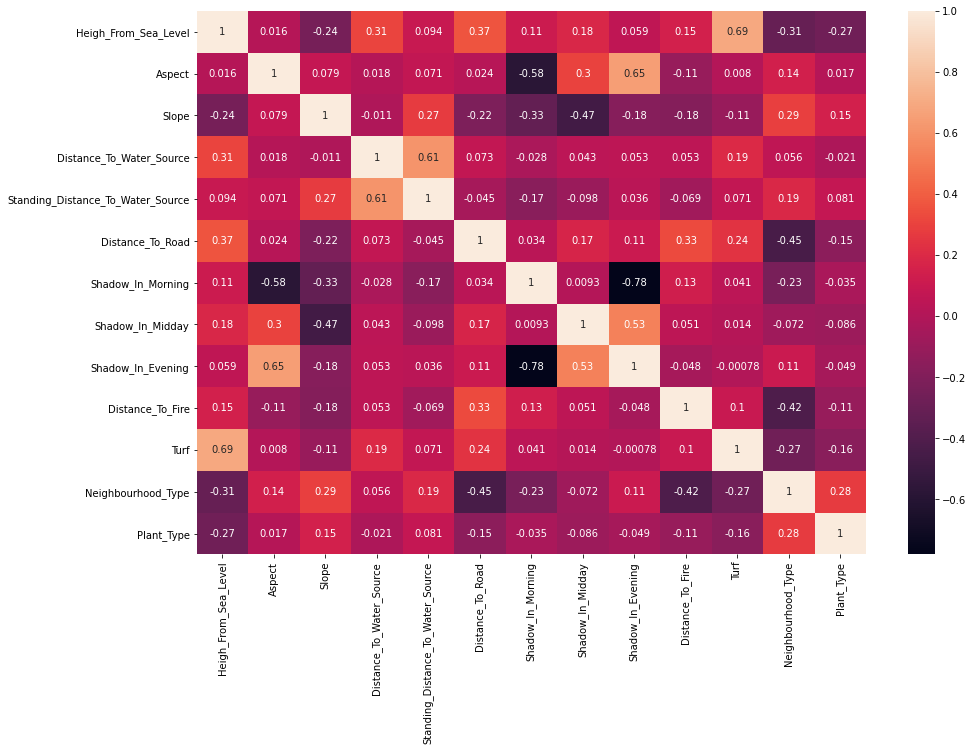

In [18]:
plt.figure(figsize=(15,10))
cor = train_new.corr()
sns.heatmap(cor, annot=True)
cor

Now, for the next part, 
Let us create key segments for all the plants (train + test) based on the average sunlight received throughout the day and their distance from waterbody to identify which segments of plants are getting enough sunlight and water vs which ones are not. This will help in mobilizing resources to track growth of trees appropriately

In [19]:
# combining train and test data
train_test = train_new.append(test_new)
train_test.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,2
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,2
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,1
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,2
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,2


In [20]:
PlantTypes = train['Plant_Type'].unique()
List_of_avg_WaterDistance = []
List_of_avg_sunlight = []
for i in range(1,len(PlantTypes)+1):
    List_of_avg_WaterDistance.append(np.mean(train_test[train_test['Plant_Type']==(i)]['Distance_To_Water_Source']))
    
for i in range(1,len(PlantTypes)+1):
    List_of_avg_sunlight.append(np.mean(train_test[train_test['Plant_Type']==(i)]['Shadow_In_Morning'])+np.mean(train_test[train_test['Plant_Type']==(i)]['Shadow_In_Evening'])+np.mean(train_test[train_test['Plant_Type']==(i)]['Shadow_In_Midday']))

In [21]:
List_of_avg_WaterDistance

[270.5552445241692,
 279.9164422292897,
 210.2764725625105,
 106.93483800509647,
 212.35489307911092,
 159.85345770714574,
 356.9946855192589]

In [22]:
List_of_avg_sunlight

[579.2125944108761,
 581.6957935199664,
 559.4431112602786,
 557.7076811066618,
 565.2148951859265,
 553.6991996314849,
 573.9233057045344]

[Text(0.5, 0, 'Plant Types')]

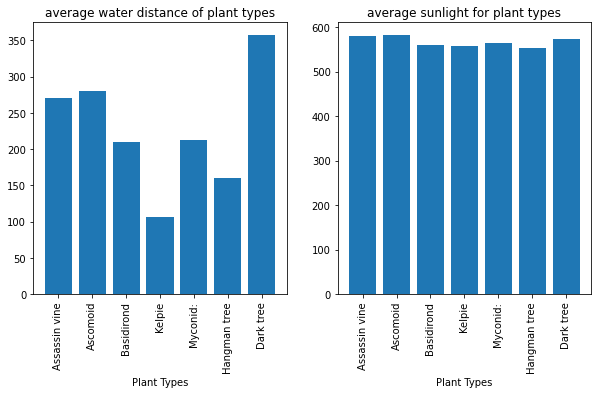

In [23]:
fig,(ax1, ax2) =  plt.subplots(1,2, figsize=(10,5))
ax1.bar(PlantTypes, List_of_avg_WaterDistance)
ax2.bar(PlantTypes, List_of_avg_sunlight)
ax1.tick_params(axis='x',  rotation=90)
ax2.tick_params(axis='x',  rotation=90)
ax1.set_title('average water distance of plant types')
ax1.set(xlabel = 'Plant Types')
ax2.set_title('average sunlight for plant types')
ax2.set(xlabel = 'Plant Types')

From above figures, we can see that what is the average distance of each type of plant from water and what is the average sulight received for each plant type. We can see which plants are getting sufficient water and sunlight.

Water:
plant type - Kelpie has the shortest avg distance from the water source thus, it is getting the most water.
plant type - Hangman tree, Basidirond, Myconid are also near to the water source so, they are getting enough water.
plant type - Assassin vine, Ascomoid are further away from the water source as compared to plant types mentioned above. These 2 are getting less water.
plant type - dark tree is getting the least water as it has larger avg distance from water as compare to all other types.

Sunlight:
all the plant types are getting good and enough sunlight. There is very less difference in the shadow index value of each plant type.


So far, we have done the exploratory data analysis, data pre-processing, and data enginerring.

-> We found some missing values and we replaced it with the mean of respective column.

-> Although it looks like there are some outliers present but we saw afterwards that that was not the case.

-> There are many independent variables which are not correlated to the target variable - Plant_Type.

-> We saw that the data is not balanced.

-> As a part of the assigment, we also checked which plant types are getting enough water and sunlight and which plant types 
   are not getting it.

### Data Preparation for Predictive Modeling

In [24]:
Target_train_var = train_new['Plant_Type']
train_new = train_new.drop(['Plant_Type'],axis = 1)
train_new.shape

(464809, 12)

In [25]:
Target_test_var = test_new['Plant_Type']
test_new = test_new.drop(['Plant_Type'],axis = 1)
test_new.shape

(116203, 12)

Applying PCA technique to reduce the dimentionality of data set. PCA is used to create new uncorrelated variables that successively maximize variance.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(.95)       # It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.
scaler = StandardScaler()
scaler.fit(train_new)
train_new = scaler.transform(train_new)

pca.fit(train_new)
train_pca = pca.transform(train_new)
train_pca.shape

(464809, 10)

In [27]:
scaler = StandardScaler()
scaler.fit(test_new)
test_new = scaler.transform(test_new)

pca.fit(test_new)
test_pca = pca.transform(test_new)
test_pca.shape

(116203, 10)

### Classification Model Predictions with hyperparameter tuning.

Since we know that our data is not balanced, let us try the models which works fine with imbalanced data such as KNN model.

####  K Nearest Neighbors (KNN) Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

error = []
for i in range(2, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_pca, Target_train_var)
    pred = knn.predict(test_pca)
    error.append(np.mean(pred != Target_test_var))

Text(0, 0.5, 'Mean Error')

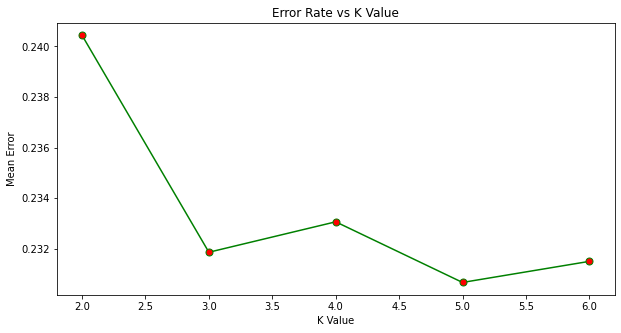

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 7), error, color='green', marker='o', markerfacecolor='red', markersize=7)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
classifier = KNeighborsClassifier(n_neighbors=5)
train_start_time = time.time()
classifier.fit(train_pca, Target_train_var)
train_end_time = time.time()
test_start_time = time.time()
test_pred = classifier.predict(test_pca)
test_end_time = time.time()
cm = confusion_matrix(Target_test_var, test_pred)
print(cm)

print(classification_report(Target_test_var, test_pred))

print('training time =', train_end_time - train_start_time, 'seconds')
print('testing time =', test_end_time - test_start_time, 'seconds')

[[31548 10135    44     0    81    24   521]
 [ 8089 46810   694    24   537   349    93]
 [   27   690  5383   133    40   993     0]
 [    0    12   293   203     0    55     0]
 [  226   890    72     0   690    17     0]
 [   38   555   944    50    16  1833     0]
 [  970   191     0     0     0     0  2933]]
              precision    recall  f1-score   support

           1       0.77      0.74      0.76     42353
           2       0.79      0.83      0.81     56596
           3       0.72      0.74      0.73      7266
           4       0.50      0.36      0.42       563
           5       0.51      0.36      0.42      1895
           6       0.56      0.53      0.55      3436
           7       0.83      0.72      0.77      4094

    accuracy                           0.77    116203
   macro avg       0.67      0.61      0.64    116203
weighted avg       0.77      0.77      0.77    116203

training time = 6.677121639251709 seconds
testing time = 129.94371438026428 seconds


we can see that overall precision, recall and accuracy is good but not best. as the data is not balanced, I am going to try the over re-sampling method called SMOTE. It achieves a more balanced class distribution by duplicating minority class instances. No information is lost in oversampling as all original instances of the minority and the majority classes are retained in the oversampled dataset. SMOTE - Synthetic Minority Over-sampling Technique has been designed to generate new samples that are coherent with the minor class distribution.
Let us see if we can improve the performance of our model with this approach.

In [32]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
train_after_smote, Target_train_after_smote = sm.fit_resample(train_new, Target_train_var)
from collections import Counter
print('Resampled dataset shape %s' % Counter(Target_train_after_smote))

Resampled dataset shape Counter({2: 226705, 1: 226705, 3: 226705, 6: 226705, 7: 226705, 5: 226705, 4: 226705})


while using SMOTE method, I am not using the dataframe created after using PCA. The reason is that I ran the model using
PCA + Smote but accuracy of the model went down to 75% from 77%.
Thus I am going to use the original train dataset withour PCA for SMOTE and will use that for running model.

Text(0, 0.5, 'Mean Error')

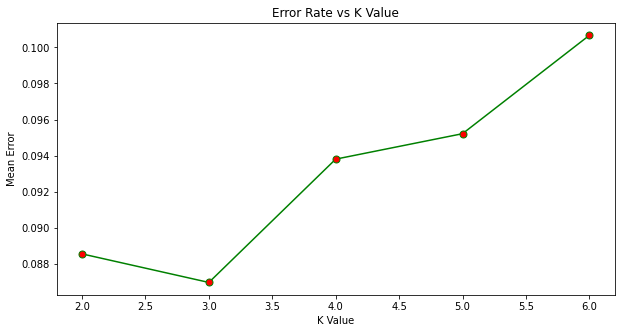

In [33]:
# trying the KNN model again to see if there is any improvement after resampling

error = []
for i in range(2, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_after_smote, Target_train_after_smote)
    pred = knn.predict(test_new)
    error.append(np.mean(pred != Target_test_var))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 7), error, color='green', marker='o', markerfacecolor='red', markersize=7)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

we can see that best value for K is 3 and after that the error is increasing as the value for K increases.
If we use smaller value of k then it will not affect the classes with smaller amount but will help to classify them better.

[[39085  2654    10     0   133    30   441]
 [ 3479 51336   388     4   861   456    72]
 [    4    79  6539   112    18   514     0]
 [    0     1    79   452     0    31     0]
 [   24   114    18     0  1728     9     2]
 [    5    56   345    41    13  2976     0]
 [  102    10     0     0     0     0  3982]]


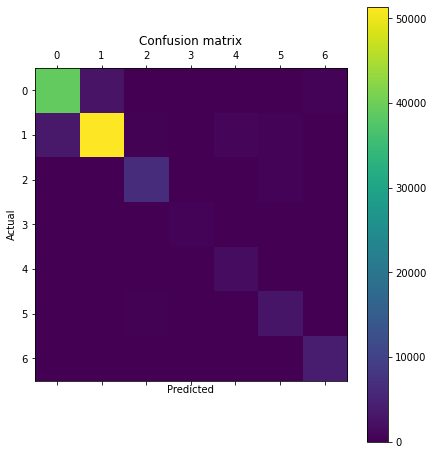

              precision    recall  f1-score   support

           1       0.92      0.92      0.92     42353
           2       0.95      0.91      0.93     56596
           3       0.89      0.90      0.89      7266
           4       0.74      0.80      0.77       563
           5       0.63      0.91      0.74      1895
           6       0.74      0.87      0.80      3436
           7       0.89      0.97      0.93      4094

    accuracy                           0.91    116203
   macro avg       0.82      0.90      0.85    116203
weighted avg       0.92      0.91      0.91    116203

training time = 428.77213048934937 seconds
testing time = 78.81513547897339 seconds


In [34]:
classifier = KNeighborsClassifier(n_neighbors=3)
train_start_time = time.time()
classifier.fit(train_after_smote, Target_train_after_smote)
train_end_time = time.time()
test_start_time = time.time()
test_pred = classifier.predict(test_new)
test_end_time = time.time()
cm = confusion_matrix(Target_test_var, test_pred)
print(cm)
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111)
colax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(colax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(Target_test_var, test_pred))

print('training time =', train_end_time - train_start_time, 'seconds')
print('testing time =', test_end_time - test_start_time, 'seconds')

We can see that there is a significant improvement in our model now. Overall precision, recall and accuracy is very good as compare to before.
Earlier, as the data was highly imbalanced, accuracy was coming 77% but after using SMOTE, accuracy is coming 91%.

Drawback - as we can see training time has increased a lot as compared to previous model run. Earlier it was around 7 seconds but now it is around 7 minutes. This is understandable because as we have done over sampling on the data, so, the data has increased a lot. So, it will take more time as compared to earlier.

#### Gradient Boosting Model

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators= 20)
train_start_time = time.time()
gbm.fit(train_after_smote, Target_train_after_smote)
train_end_time = time.time()
test_start_time = time.time()
gbm_predict_test = gbm.predict(test_new)
test_end_time = time.time()
cm = confusion_matrix(Target_test_var, gbm_predict_test)
print(cm)

print(classification_report(Target_test_var, gbm_predict_test))
print('training time =', train_end_time - train_start_time, 'seconds')
print('testing time =', test_end_time - test_start_time, 'seconds')

[[28506  4853    15     0  3088   231  5660]
 [16114 21472   599     5 15094  2663   649]
 [    0     2  3480   838   258  2688     0]
 [    0     0    14   514     0    35     0]
 [    3   113    58     0  1661    60     0]
 [    0     4   546   220   192  2474     0]
 [  384     1     0     0    10     0  3699]]
              precision    recall  f1-score   support

           1       0.63      0.67      0.65     42353
           2       0.81      0.38      0.52     56596
           3       0.74      0.48      0.58      7266
           4       0.33      0.91      0.48       563
           5       0.08      0.88      0.15      1895
           6       0.30      0.72      0.43      3436
           7       0.37      0.90      0.52      4094

    accuracy                           0.53    116203
   macro avg       0.47      0.71      0.48    116203
weighted avg       0.70      0.53      0.56    116203

training time = 1776.3019092082977 seconds
testing time = 0.44420576095581055 seconds


This model does not give good accuracy and it also takes a lot of time to train.

#### Random Forest

[0.8350214710463585, 0.9479187284321403, 0.9542180494479489, 0.955784274072098, 0.9575226112923074, 0.9576689069989587, 0.9584348080514272, 0.9575914563307316, 0.958288512344776, 0.9586499487965027]


Text(0, 0.5, 'Accuracy')

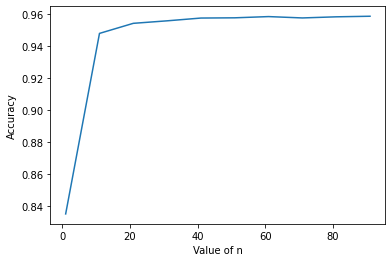

In [39]:
n_est = list(range(1, 101, 10))
accuracy = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n)
    rf.fit(train_after_smote, Target_train_after_smote)
    score = rf.score(test_new, Target_test_var)
    accuracy.append(score)
print(accuracy)    
plt.plot(n_est, accuracy)
plt.xlabel('Value of n')
plt.ylabel('Accuracy')

We can see that the performance of the model increases as we increase the value of n_estimators.

At n_estimators = 20, the accuracy is around 95%.
After n = 20, the accuracy still keeps increasing but that is very little and the computation time will increase a lot.
so, I am keeping n_estimators = 20.

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(n_estimators=20)
train_start_time = time.time()
rfm.fit(train_after_smote, Target_train_after_smote)
train_end_time = time.time()
test_start_time = time.time()
rfm_predict = rfm.predict(test_new)
test_end_time = time.time()
cm = confusion_matrix(Target_test_var, rfm_predict)
print(cm)

print(classification_report(Target_test_var, rfm_predict))
print('training time =', train_end_time - train_start_time, 'seconds')
print('testing time =', test_end_time - test_start_time, 'seconds')

[[40655  1439     4     0    52    14   189]
 [ 2013 53720   305     2   309   220    27]
 [    0    56  6888    36     6   280     0]
 [    0     0    83   448     0    32     0]
 [    9   108    17     0  1752     9     0]
 [    2    34   207    11     8  3174     0]
 [   82     8     0     0     0     0  4004]]
              precision    recall  f1-score   support

           1       0.95      0.96      0.96     42353
           2       0.97      0.95      0.96     56596
           3       0.92      0.95      0.93      7266
           4       0.90      0.80      0.85       563
           5       0.82      0.92      0.87      1895
           6       0.85      0.92      0.89      3436
           7       0.95      0.98      0.96      4094

    accuracy                           0.95    116203
   macro avg       0.91      0.93      0.92    116203
weighted avg       0.95      0.95      0.95    116203

training time = 149.1415719985962 seconds
testing time = 0.7511727809906006 seconds


Randomo Forest Model is giving a best accuracy among all the models we tried.
I have kept n_estimators = 20 as this gives 95% accuracy and still takes less computation time. 

### Comparison of model using performance KPIs, Training & Testing Time

| Model             	| Accuracy 	| Precision and Recall           	| Training and Testing Time                       	|
|-------------------	|----------	|--------------------------------	|-------------------------------------------------	|
| KNN               	| 91%      	| Good precision but less recall 	| average time as compared to other models        	|
| Gradient Boosting 	| 53%      	| lowest precision and recall    	| longest training time but shortest testing time 	|
| Random Forest     	| 95%      	| best precision and recall      	| fastest training and testing time     	        |

### Final predictive model recommendation 

I would recommend Random Forest for this problem.

--> Best accuracy, precision and recall as compared to KNN and gradient boosting model that I tried.

--> Fastest training time (2 minutes) and best testing time (less than a seconds only) as compred to other models I tried

--> KNN model would be my 2nd preference as KNN also has a good accuracy and decent computation time. It could have been faster but as I used over sampling method (SMOTE), it took longer time to train.